<a href="https://colab.research.google.com/github/GiannaSal/phase-2-project/blob/main/updated_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Zipped Data Review & Analysis

Below are the list of available zipped databases:
1. Box Office Mojo (bom.movie_gross.csv.gz)
2. IMDB (im.db.zip)
3. Rotten Tomatoes info (rt.movie_info.tsv.gz)
4. Rotten Tomatoes reviews (rt.reviews.tsv.gz)
5. The Movie Database (tmdb.movies.csv.gz)
6. The Numbers (tn.movie_budgets.csv.gz)


## 1. <u>Box Office Mojo</u>

In [141]:
# Iporting the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import re

# Keep plots readable
sns.set_theme()

# Loading the bom movie gross dataset
df_bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
print(df_bom.shape)
print(df_bom.columns)

(3387, 5)
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [15]:
# Review the columns number and types of the table
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [136]:
# Summary of the raw data
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year,earnings
0,Toy Story 3,BV,"415,000,000.00","652,000,000.00",2010,"1,067,000,000.00"
1,Alice in Wonderland (2010),BV,"334,200,000.00","691,300,000.00",2010,"1,025,500,000.00"
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00","664,300,000.00",2010,"960,300,000.00"
3,Inception,WB,"292,600,000.00","535,700,000.00",2010,"828,300,000.00"
4,Shrek Forever After,P/DW,"238,700,000.00","513,900,000.00",2010,"752,600,000.00"


### Box Office Mojo Column checks and missing values

The earnings data comes from Box Office Mojo (df_bom), while genre data comes from IMDb movie basics (df_basics). These two sources must be merged to connect earnings to genres.

In [137]:
# Check relevant columns and missing values (Box Office Mojo)
bom_cols = ['title', 'year', 'domestic_gross', 'foreign_gross']
df_bom[bom_cols].isna().sum()

title                0
year                 0
domestic_gross      28
foreign_gross     1355
dtype: int64

In [138]:
# Check relevant columns and missing values (IMDb movie basics)
imdb_cols = ['primary_title', 'start_year', 'genres']
df_basics[imdb_cols].isna().sum()

primary_title       0
start_year          0
genres           5408
dtype: int64

In [139]:
# Confirm the year coverage in the box office dataset
df_bom['year'].describe()

count   3,387.00
mean    2,013.96
std         2.48
min     2,010.00
25%     2,012.00
50%     2,014.00
75%     2,016.00
max     2,018.00
Name: year, dtype: float64

### Clean year and earnings
* Ensures `year` is numeric and usable.
* Ensures `earnings` fields are numeric.
* Creates one `earnings` column for analysis.

In [142]:
# Ensure year is numeric
df_bom['year'] = pd.to_numeric(df_bom['year'], errors='coerce')

# Ensure gross columns are numeric
df_bom['domestic_gross'] = pd.to_numeric(df_bom['domestic_gross'], errors='coerce')
df_bom['foreign_gross'] = pd.to_numeric(df_bom['foreign_gross'], errors='coerce')

# Total earnings (domestic + foreign)
df_bom['earnings'] = df_bom[['domestic_gross', 'foreign_gross']].sum(axis=1, min_count=1)

# Keep rows with valid year and earnings
df_bom_clean = df_bom.dropna(subset=['year', 'earnings']).copy()
df_bom_clean['year'] = df_bom_clean['year'].astype(int)

# Reset index after filtering
df_bom_clean = df_bom_clean.reset_index(drop=True)

df_bom_clean[['title', 'year', 'earnings']].head()

,title,year,earnings
0,Toy Story 3,2010,"1,067,000,000.00"
1,Alice in Wonderland (2010),2010,"1,025,500,000.00"
2,Harry Potter and the Deathly Hallows Part 1,2010,"960,300,000.00"
3,Inception,2010,"828,300,000.00"
4,Shrek Forever After,2010,"752,600,000.00"


## 2. <u>IMDB Data Review</u>

In [18]:
from pathlib import Path
import os

print("CWD:", os.getcwd())
print("\nTop-level files/folders:")
for p in Path(".").iterdir():
    print(" -", p.resolve())

CWD: c:\Users\kelvi\Documents\git_practice\Phase 2\dsc-phase-2-project-v3 (Personal)

Top-level files/folders:
 - C:\Users\kelvi\Documents\git_practice\Phase 2\dsc-phase-2-project-v3 (Personal)\.git
 - C:\Users\kelvi\Documents\git_practice\Phase 2\dsc-phase-2-project-v3 (Personal)\CONTRIBUTING.md
 - C:\Users\kelvi\Documents\git_practice\Phase 2\dsc-phase-2-project-v3 (Personal)\data_cleaning.ipynb
 - C:\Users\kelvi\Documents\git_practice\Phase 2\dsc-phase-2-project-v3 (Personal)\index.ipynb
 - C:\Users\kelvi\Documents\git_practice\Phase 2\dsc-phase-2-project-v3 (Personal)\LICENSE.md
 - C:\Users\kelvi\Documents\git_practice\Phase 2\dsc-phase-2-project-v3 (Personal)\movie_data_erd.jpeg
 - C:\Users\kelvi\Documents\git_practice\Phase 2\dsc-phase-2-project-v3 (Personal)\Phase_2_Project_Karigi.ipynb
 - C:\Users\kelvi\Documents\git_practice\Phase 2\dsc-phase-2-project-v3 (Personal)\README.md
 - C:\Users\kelvi\Documents\git_practice\Phase 2\dsc-phase-2-project-v3 (Personal)\unzipped
 - C:\User

In [11]:
from pathlib import Path

def find_one(filename: str) -> Path:
    matches = list(Path(".").rglob(filename))
    if not matches:
        raise FileNotFoundError(f"Couldn't find {filename} anywhere under: {Path('.').resolve()}")
    if len(matches) > 1:
        print("Multiple matches found, using the first one:")
        for m in matches[:10]:
            print(" -", m.resolve())
    return matches[0].resolve()

print("bom.movie_gross.csv.gz:", find_one("bom.movie_gross.csv.gz"))
print("im.db:", find_one("im.db") if list(Path(".").rglob("im.db")) else "No im.db found yet")
print("im.db.zip:", find_one("im.db.zip") if list(Path(".").rglob("im.db.zip")) else "No im.db.zip found")
print("zippedData.zip:", find_one("zippedData.zip") if list(Path(".").rglob("zippedData.zip")) else "No zippedData.zip found")

bom.movie_gross.csv.gz: C:\Users\kelvi\Documents\git_practice\Phase 2\dsc-phase-2-project-v3 (Personal)\zippedData\bom.movie_gross.csv.gz
Multiple matches found, using the first one:
 - C:\Users\kelvi\Documents\git_practice\Phase 2\dsc-phase-2-project-v3 (Personal)\unzipped\im.db
 - C:\Users\kelvi\Documents\git_practice\Phase 2\dsc-phase-2-project-v3 (Personal)\unzippedData\im.db
 - C:\Users\kelvi\Documents\git_practice\Phase 2\dsc-phase-2-project-v3 (Personal)\unzipped\im.db\im.db
im.db: C:\Users\kelvi\Documents\git_practice\Phase 2\dsc-phase-2-project-v3 (Personal)\unzipped\im.db


im.db.zip: C:\Users\kelvi\Documents\git_practice\Phase 2\dsc-phase-2-project-v3 (Personal)\zippedData\im.db.zip
zippedData.zip: No zippedData.zip found


In [ ]:
# Unzip the file from the correct nested path
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData')

# Connect to the SQLite database, which should now be extracted to unzippedData/im.db
conn = sqlite3.connect('unzippedData/im.db')

# view the list of tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

print("Tables:", tables)

Tables:             name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [28]:
# Looping through each table name found above
for table_name in tables['name']:
    print("\n"f"--- Table: {table_name} ---")

    # 1. Get the number of rows (SELECT count(*))
    query_count = f"SELECT count(*) as count FROM {table_name}"
    df_count = pd.read_sql(query_count, conn)
    row_count = df_count.iloc[0]['count']
    print(f"Row Count: {row_count}")

    # 2. Get the column info (PRAGMA table_info matches the table schema)
    query_info = f"PRAGMA table_info({table_name})"
    df_info = pd.read_sql(query_info, conn)

    # Display just the column name and data type
    print("Columns:")
    print(df_info[['name', 'type']].to_string())
    print("\n" + "="*30 + "\n")


--- Table: movie_basics ---
Row Count: 146144
Columns:
              name     type
0         movie_id     TEXT
1    primary_title     TEXT
2   original_title     TEXT
3       start_year  INTEGER
4  runtime_minutes     REAL
5           genres     TEXT



--- Table: directors ---
Row Count: 291174
Columns:
        name  type
0   movie_id  TEXT
1  person_id  TEXT



--- Table: known_for ---
Row Count: 1638260
Columns:
        name  type
0  person_id  TEXT
1   movie_id  TEXT



--- Table: movie_akas ---
Row Count: 331703
Columns:
                name     type
0           movie_id     TEXT
1           ordering  INTEGER
2              title     TEXT
3             region     TEXT
4           language     TEXT
5              types     TEXT
6         attributes     TEXT
7  is_original_title     REAL



--- Table: movie_ratings ---
Row Count: 73856
Columns:
            name     type
0       movie_id     TEXT
1  averagerating     REAL
2       numvotes  INTEGER



--- Table: persons ---
Row Count

In [29]:
# Read columns within the Table: 'Movie_Basics' to check the structure
df_basics = pd.read_sql("SELECT * FROM movie_basics", conn)

# View columns and types
print(df_basics.info())

# View raw data
df_basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### Clean IMDb basics

* Ensures start_year is numeric.
* Ensures genres exists.
* Keeps only the columns needed for merging and genre analysis.

In [143]:
# Ensure start_year is numeric
df_basics['start_year'] = pd.to_numeric(df_basics['start_year'], errors='coerce')

# Keep rows with valid year and genres
df_imdb_clean = df_basics.dropna(subset=['start_year', 'genres', 'primary_title']).copy()
df_imdb_clean['start_year'] = df_imdb_clean['start_year'].astype(int)

# Keep only columns needed downstream
df_imdb_clean = df_imdb_clean[['movie_id', 'primary_title', 'start_year', 'genres']].copy()

# Reset index after filtering
df_imdb_clean = df_imdb_clean.reset_index(drop=True)

df_imdb_clean.head()

,movie_id,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


### Create merge keys and merge datasets (Box Office Mojo and IMDb)

To match titles across sources, titles are normalized into a `clean_title` key.

- Removes the trailing year in parentheses (e.g., `"(2010)"`).
- Normalizes punctuation/spaces.
- Uses `clean_title` + `year` as the merge key.

In [144]:
# Helper function to normalize titles into a merge key
def clean_title(title):
    if pd.isna(title):
        return np.nan

    t = str(title)
    # Remove trailing year in parentheses: "Title (2010)" -> "Title"
    t = re.sub(r"\s*\(\d{4}\)\s*$", "", t)

    # Align common differences
    t = t.replace("&", "and")

    # Keep alphanumeric characters and spaces only
    t = re.sub(r"[^0-9a-zA-Z]+", " ", t)

    # Normalize spacing and case
    t = re.sub(r"\s+", " ", t).strip().lower()
    return t

# Create clean title keys
df_bom_clean['clean_title'] = df_bom_clean['title'].map(clean_title)
df_imdb_clean['clean_title'] = df_imdb_clean['primary_title'].map(clean_title)

# Merge: earnings (BOM) + genres (IMDb)
df_merged = df_bom_clean.merge(
    df_imdb_clean,
    left_on=['clean_title', 'year'],
    right_on=['clean_title', 'start_year'],
    how='inner'
)

# Keep a tidy merged dataset
df_merged = df_merged[['title', 'year', 'earnings', 'movie_id', 'primary_title', 'genres']].copy()

# Reset index after merge
df_merged = df_merged.reset_index(drop=True)

# # Set global format for floats: 2 decimal places, comma separator
pd.options.display.float_format = '{:,.2f}'.format

df_merged.head()

,title,year,earnings,movie_id,primary_title,genres
0,Toy Story 3,2010,"1,067,000,000.00",tt0435761,Toy Story 3,"Adventure,Animation,Comedy"
1,Alice in Wonderland (2010),2010,"1,025,500,000.00",tt1014759,Alice in Wonderland,"Adventure,Family,Fantasy"
2,Alice in Wonderland (2010),2010,"1,025,500,000.00",tt2049386,Alice in Wonderland,"Fantasy,Musical"
3,Harry Potter and the Deathly Hallows Part 1,2010,"960,300,000.00",tt0926084,Harry Potter and the Deathly Hallows: Part 1,"Adventure,Fantasy,Mystery"
4,Inception,2010,"828,300,000.00",tt1375666,Inception,"Action,Adventure,Sci-Fi"


In [145]:
# Merge coverage check
bom_rows = df_bom_clean.shape[0]
merged_rows = df_merged.shape[0]
match_rate = merged_rows / bom_rows

pd.DataFrame({
    'dataset': ['df_bom_clean', 'df_merged'],
    'rows': [bom_rows, merged_rows]
}).assign(match_rate_to_bom=[np.nan, match_rate])

,dataset,rows,match_rate_to_bom
0,df_bom_clean,3387,NaN
1,df_merged,2210,0.65


## <u>Analysis:</u> Which Genre Consistently Earns the Most?

`Definition used here:` a genre is “consistent” if it ranks #1 (or among the top) in most years and its yearly earnings are high with relatively low variance.

`Important note on multi-genre movies:` IMDb genres are multi-label (a movie can belong to multiple genres). If earnings are summed across genres without adjustment, multi-genre movies get counted multiple times. To avoid this, this analysis allocates each movie’s earnings equally across its genres (e.g., a 3-genre movie contributes 1/3 of its earnings to each genre).

In [146]:
# Split genres and create one row per (movie, genre)
df_merged = df_merged.dropna(subset=['genres', 'earnings', 'year']).copy()

df_merged['genres_list'] = df_merged['genres'].str.split(',')
df_merged['n_genres'] = df_merged['genres_list'].str.len()

# Explode into long format
df_long = df_merged.explode('genres_list').rename(columns={'genres_list': 'genre'}).copy()

# Allocate earnings to avoid double-counting across genres
df_long['earnings_allocated'] = df_long['earnings'] / df_long['n_genres']

# Basic checks
df_long[['title', 'year', 'genre', 'earnings', 'earnings_allocated']].head()

,title,year,genre,earnings,earnings_allocated
0,Toy Story 3,2010,Adventure,"1,067,000,000.00","355,666,666.67"
0,Toy Story 3,2010,Animation,"1,067,000,000.00","355,666,666.67"
0,Toy Story 3,2010,Comedy,"1,067,000,000.00","355,666,666.67"
1,Alice in Wonderland (2010),2010,Adventure,"1,025,500,000.00","341,833,333.33"
1,Alice in Wonderland (2010),2010,Family,"1,025,500,000.00","341,833,333.33"


In [147]:
# Total yearly earnings per genre (allocated)
yearly_genre_earnings = (
    df_long
    .groupby(['year', 'genre'], as_index=False)['earnings_allocated']
    .sum()
    .rename(columns={'earnings_allocated': 'yearly_earnings'})
)

# Rank genres by yearly earnings within each year (1 = highest)
yearly_genre_earnings['rank'] = yearly_genre_earnings.groupby('year')['yearly_earnings'] \
    .rank(method='dense', ascending=False)


yearly_genre_earnings.sort_values(['year', 'rank']).head(15)

,year,genre,yearly_earnings,rank
1,2010,Adventure,"4,283,672,333.33",1.00
4,2010,Comedy,"3,382,376,833.00",2.00
0,2010,Action,"2,888,279,166.33",3.00
7,2010,Drama,"2,486,601,383.00",4.00
9,2010,Fantasy,"2,260,500,900.00",5.00
2,2010,Animation,"1,390,600,000.00",6.00
8,2010,Family,"1,367,622,783.33",7.00
15,2010,Romance,"1,133,100,016.33",8.00
18,2010,Thriller,"1,053,738,483.00",9.00
14,2010,Mystery,"658,359,866.67",10.00


In [148]:
# Count how many years each genre is ranked #1 and in the top 3
years_rank1 = (
    yearly_genre_earnings[yearly_genre_earnings['rank'] == 1]
    .groupby('genre')['year']
    .nunique()
    .rename('years_rank1')
)

years_top3 = (
    yearly_genre_earnings[yearly_genre_earnings['rank'] <= 3]
    .groupby('genre')['year']
    .nunique()
    .rename('years_top3')
)

# Mean and standard deviation of yearly earnings per genre
genre_stats = (
    yearly_genre_earnings
    .groupby('genre')['yearly_earnings']
    .agg(mean_yearly='mean', std_yearly='std', years_present='count')
)

# Combine into one summary table
genre_summary = (
    genre_stats
    .join(years_rank1, how='left')
    .join(years_top3, how='left')
    .fillna(0)
    .reset_index()
)

# Coefficient of variation (lower = more stable relative to mean)
genre_summary['cv'] = genre_summary['std_yearly'] / genre_summary['mean_yearly']

# Sort: most #1 years, then most top-3 years, then highest mean
genre_summary_sorted = genre_summary.sort_values(
    ['years_rank1', 'years_top3', 'mean_yearly'],
    ascending=[False, False, False]
)

genre_summary_sorted.head(10)

,genre,mean_yearly,std_yearly,years_present,years_rank1,years_top3,cv
1,Adventure,"4,865,948,553.39","621,782,992.64",9,7.00,9.00,0.13
0,Action,"4,229,446,081.07","933,152,663.61",9,2.00,9.00,0.22
4,Comedy,"3,407,434,056.87","379,796,556.17",9,0.00,9.00,0.11
7,Drama,"2,771,755,456.56","380,873,410.50",9,0.00,0.00,0.14
17,Sci-Fi,"1,564,856,581.37","643,581,258.85",9,0.00,0.00,0.41
9,Fantasy,"1,505,560,196.20","530,072,037.58",9,0.00,0.00,0.35
2,Animation,"1,459,251,505.44","319,480,171.55",9,0.00,0.00,0.22
19,Thriller,"1,364,251,527.63","388,248,684.88",9,0.00,0.00,0.28
5,Crime,"762,631,994.37","329,489,927.71",9,0.00,0.00,0.43
16,Romance,"704,530,635.00","302,215,737.08",9,0.00,0.00,0.43


In [149]:
# Identify the most consistent high-earning genres
# Rule of thumb used here:
# - Prioritize years_rank1 and years_top3
# - Prefer high mean_yearly and relatively low cv

top_consistent = genre_summary_sorted.head(8).copy()
top_consistent

,genre,mean_yearly,std_yearly,years_present,years_rank1,years_top3,cv
1,Adventure,"4,865,948,553.39","621,782,992.64",9,7.00,9.00,0.13
0,Action,"4,229,446,081.07","933,152,663.61",9,2.00,9.00,0.22
4,Comedy,"3,407,434,056.87","379,796,556.17",9,0.00,9.00,0.11
7,Drama,"2,771,755,456.56","380,873,410.50",9,0.00,0.00,0.14
17,Sci-Fi,"1,564,856,581.37","643,581,258.85",9,0.00,0.00,0.41
9,Fantasy,"1,505,560,196.20","530,072,037.58",9,0.00,0.00,0.35
2,Animation,"1,459,251,505.44","319,480,171.55",9,0.00,0.00,0.22
19,Thriller,"1,364,251,527.63","388,248,684.88",9,0.00,0.00,0.28


### Visualizing Numbers of years each Genre Ranked #1
A count of how many years each genre held the #1 ranking for earnings. The data reveals a clear monopoly: Adventure topped the charts for 7 years, followed by Action with 2 years, while no other genre achieved the number one spot during this period.

Chart saved successfully to: charts\genre_rank1_chart.png


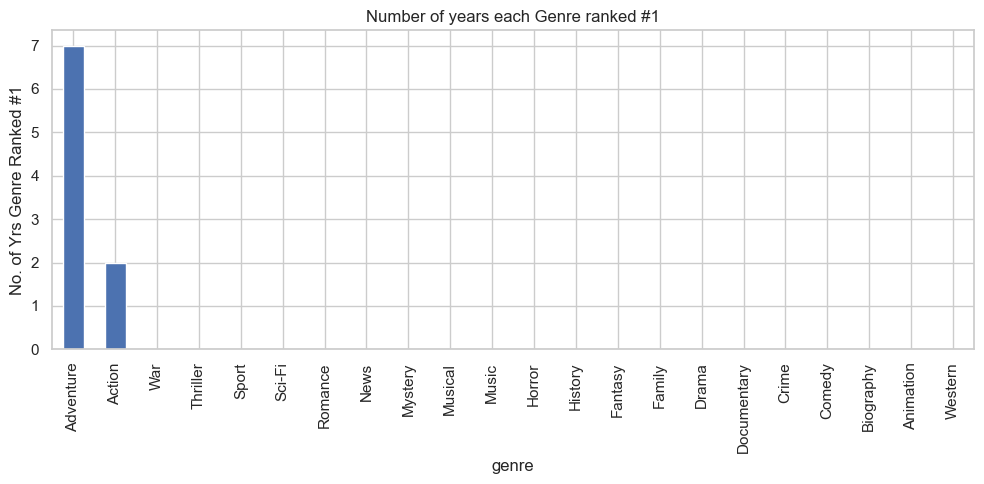

In [251]:
# Bar plot: number of years each genre ranked #1
rank1_counts = genre_summary.set_index('genre')['years_rank1'].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
rank1_counts.plot(kind='bar')
plt.ylabel('No. of Yrs Genre Ranked #1')
plt.title('Number of years each Genre ranked #1') 
plt.tight_layout()
save_path = os.path.join('charts','genre_rank1_chart.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

print(f"Chart saved successfully to: {save_path}")

plt.show()

### Frequency of Genres in the Top 5 Yearly Blockbusters

This calculates the rank for every movie within its specific year, filters for only the top 5 winners, and then counts how often each genre shows up in that winners' circle.

Chart saved successfully to: charts\Frequency_genres_top5_chart.png


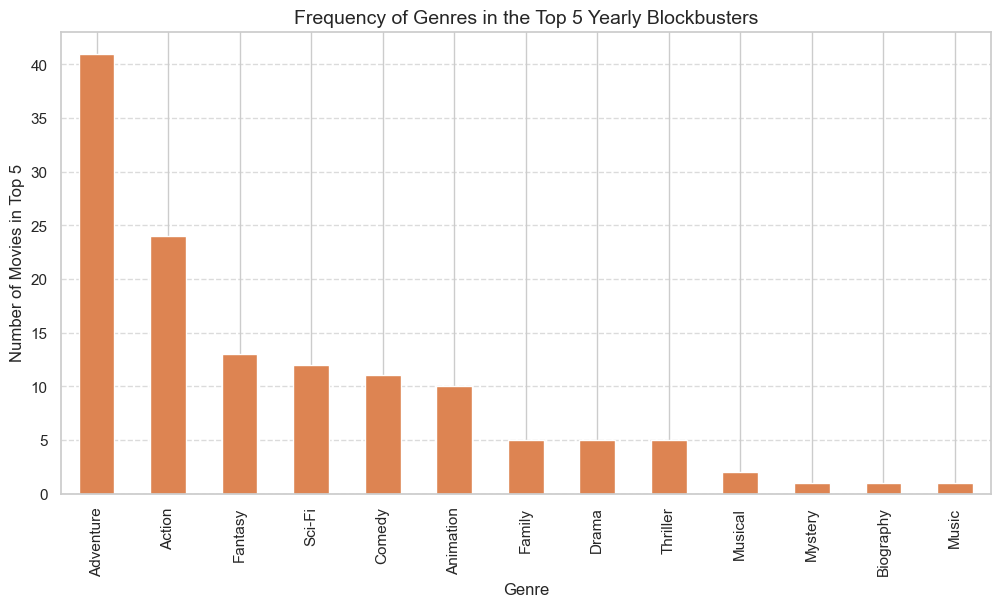

In [252]:
# 1. Calculate Rank per Year
# This creates a ranking 1, 2, 3... based on earnings within each year
df_merged['yearly_rank'] = df_merged.groupby('year')['earnings'].rank(ascending=False, method='min')

# 2. Filter for only Top 5 movies each year
top_5_movies = df_merged[df_merged['yearly_rank'] <= 5].copy()

# 3. Explode genres for these top movies only
top_5_exploded = top_5_movies.assign(genre=top_5_movies['genres'].str.split(',')).explode('genre')
top_5_exploded['genre'] = top_5_exploded['genre'].str.strip()

# 4. Count how often each genre appears in the Top 5
genre_counts = top_5_exploded['genre'].value_counts()

# 5. Plotting
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='#dd8452')

plt.title('Frequency of Genres in the Top 5 Yearly Blockbusters', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Number of Movies in Top 5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
save_path = os.path.join('charts','Frequency_genres_top5_chart.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

print(f"Chart saved successfully to: {save_path}")

plt.show()

## Total Earnings by Genre
This ignores the rankings and simply sums up all the money made by every genre across the entire dataset.

Chart saved successfully to: charts\top_earning_genres_chart.png


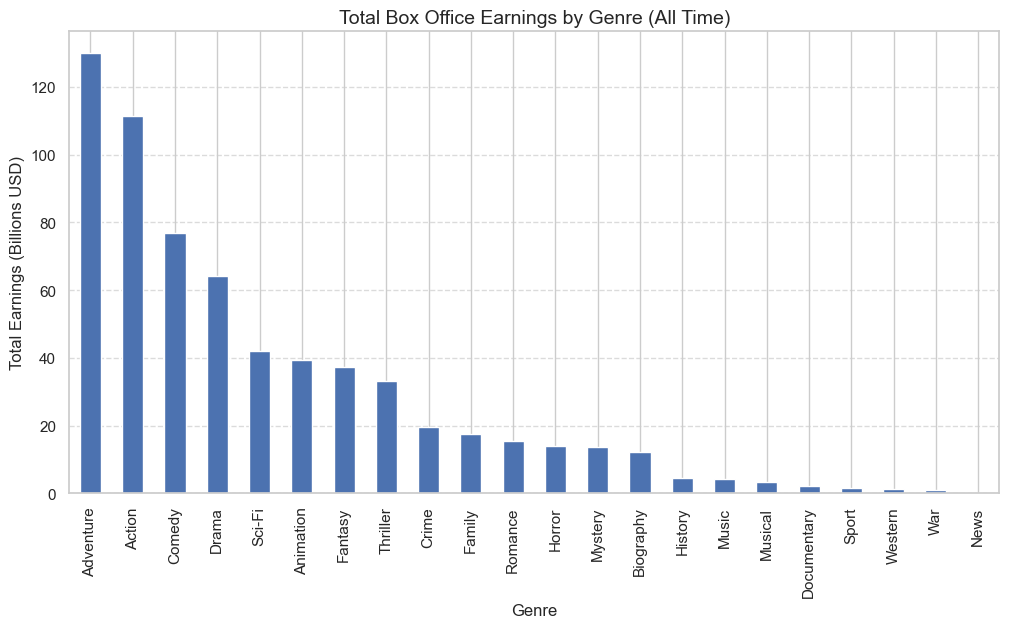

In [253]:
# 1. Prepare the data: Split 'Action, Adventure' into separate rows
# We use .copy() to ensure we don't accidentally mess up the original dataframe
df_exploded = df_merged.assign(genre=df_merged['genres'].str.split(',')).explode('genre')

# Clean up any whitespace (e.g., " Adventure" -> "Adventure")
df_exploded['genre'] = df_exploded['genre'].str.strip()

# 2. Calculate Total Earnings per Genre
# Sum the earnings, sort largest to smallest
genre_earnings = df_exploded.groupby('genre')['earnings'].sum().sort_values(ascending=False)

# 3. Plotting
plt.figure(figsize=(12, 6))
# Divide by 1e9 to show Billions, making the axis readable
(genre_earnings / 1e9).plot(kind='bar', color='#4c72b0')

plt.title('Total Box Office Earnings by Genre (All Time)', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Total Earnings (Billions USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
save_path = os.path.join('charts','top_earning_genres_chart.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

print(f"Chart saved successfully to: {save_path}")

plt.show()

## Yearly Earnings (Allocated)
This didsplays the Yearly earnings Trend for the Top Genres

Chart saved successfully to: charts\year_earning_trend_chart.png


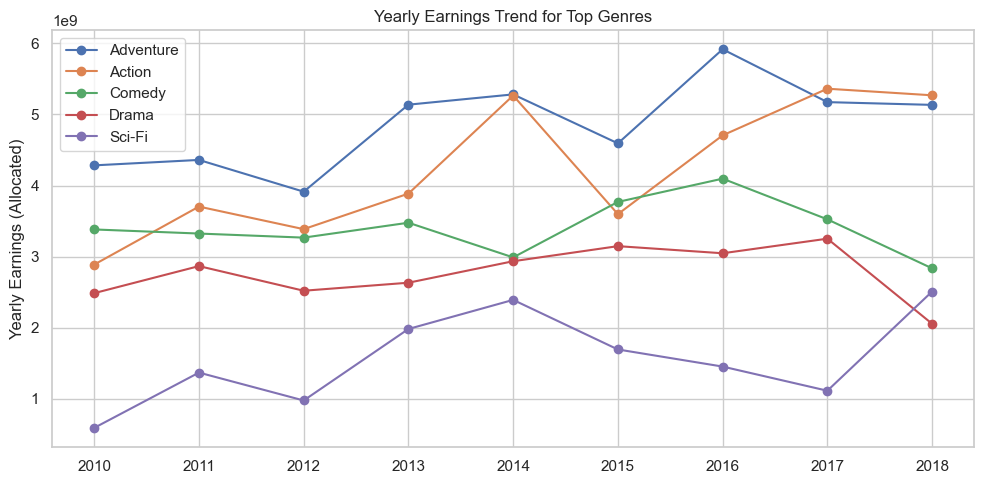

In [254]:

# Choose a small set of top genres for trend plotting
top_genres_for_trend = genre_summary_sorted['genre'].head(5).tolist()

trend_df = yearly_genre_earnings[yearly_genre_earnings['genre'].isin(top_genres_for_trend)].copy()

plt.figure(figsize=(10, 5))
for g in top_genres_for_trend:
    sub = trend_df[trend_df['genre'] == g].sort_values('year')
    plt.plot(sub['year'], sub['yearly_earnings'], marker='o', label=g)

plt.ylabel('Yearly Earnings (Allocated)')
plt.title('Yearly Earnings Trend for Top Genres')
plt.legend()
plt.tight_layout()
save_path = os.path.join('charts','year_earning_trend_chart.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

print(f"Chart saved successfully to: {save_path}")

plt.show()

## Distribution of yearly earnings by genre
Distribution of yearly earnings across top genres. Action and Adventure display the highest median earnings and the widest range, indicating high revenue potential. In contrast, genres like Romance and Crime show consistently lower earnings with less variability.

Chart saved successfully to: charts\distribution_yearly_earnings_boxplot.png


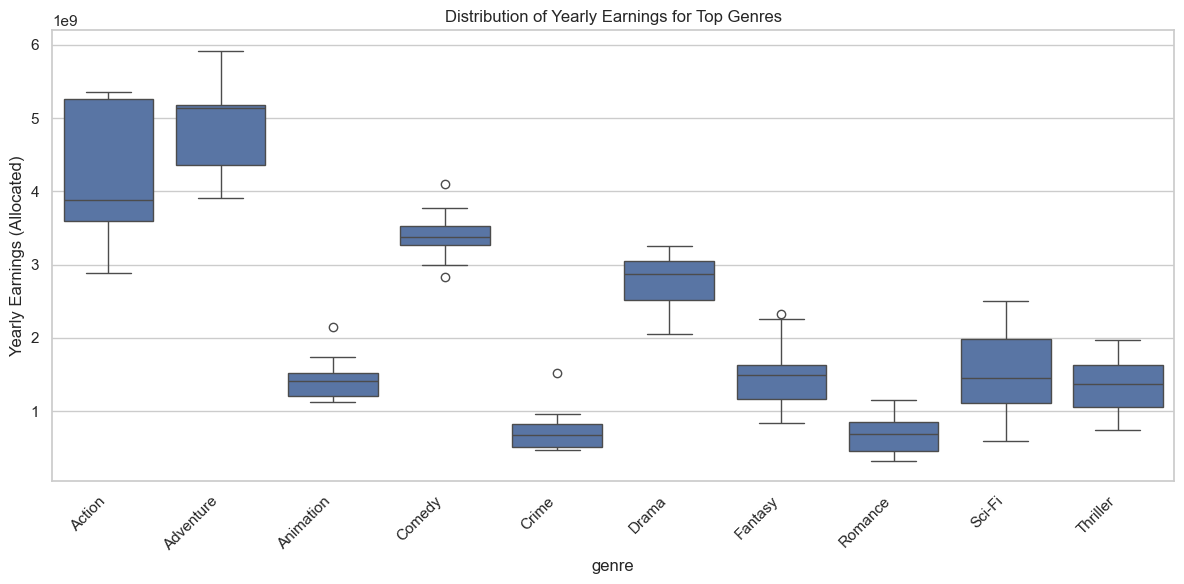

In [255]:
# Boxplot: distribution of yearly earnings by genre
# Limit to top genres to keep the plot readable
top_genres_for_box = genre_summary_sorted['genre'].head(10).tolist()
box_df = yearly_genre_earnings[yearly_genre_earnings['genre'].isin(top_genres_for_box)].copy()

plt.figure(figsize=(12, 6))
sns.boxplot(data=box_df, x='genre', y='yearly_earnings')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Yearly Earnings (Allocated)')
plt.title('Distribution of Yearly Earnings for Top Genres')
plt.tight_layout()
save_path = os.path.join('charts','distribution_yearly_earnings_boxplot.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

print(f"Chart saved successfully to: {save_path}")

plt.show()

## <u>Analysis:</u> Who are the best Creators per Budget performance ? (Directors & Writers)

In [201]:
# loading the budgets data
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

#cleaning money columns to ensure we have only numbers
for col in ['production_budget', 'worldwide_gross']:
    budgets[col] = (
        budgets[col]
        .str.replace(r'[\$,]', '', regex=True)
        .astype(float)
    )

budgets = budgets[['movie', 'production_budget', 'worldwide_gross']]
budgets.head()

,movie,production_budget,worldwide_gross
0,Avatar,"425,000,000.00","2,776,345,279.00"
1,Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","1,045,663,875.00"
2,Dark Phoenix,"350,000,000.00","149,762,350.00"
3,Avengers: Age of Ultron,"330,600,000.00","1,403,013,963.00"
4,Star Wars Ep. VIII: The Last Jedi,"317,000,000.00","1,316,721,747.00"


In [202]:
#checking movie titles
movies = pd.read_sql("""
    SELECT movie_id, primary_title
    FROM movie_basics
""", conn)

movies.head()

,movie_id,primary_title
0,tt0063540,Sunghursh
1,tt0066787,One Day Before the Rainy Season
2,tt0069049,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera


In [203]:
#checking directors
directors = pd.read_sql("""
    SELECT movie_id, person_id
    FROM directors
""", conn)

directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [204]:
#checking writers
writers = pd.read_sql("""
    SELECT movie_id, person_id
    FROM writers
""", conn)

writers.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [205]:
#checking names of existing directors and writers
people = pd.read_sql("""
    SELECT person_id, primary_name
    FROM persons
""", conn)

people.head()

,person_id,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter


In [ ]:
#merging the names of checked (directors)
directors_named = (
    directors
    .merge(people, on='person_id', how='left')
)

directors_named.head()

,movie_id,person_id,primary_name
0,tt0285252,nm0899854,Tony Vitale
1,tt0462036,nm1940585,Bill Haley
2,tt0835418,nm0151540,Jay Chandrasekhar
3,tt0835418,nm0151540,Jay Chandrasekhar
4,tt0878654,nm0089502,Albert Pyun


In [207]:
#attaching the names checked (writers)
writers_named = (
    writers
    .merge(people, on='person_id', how='left')
)

writers_named.head()

,movie_id,person_id,primary_name
0,tt0285252,nm0899854,Tony Vitale
1,tt0438973,nm0175726,Steve Conrad
2,tt0438973,nm1802864,Sean Sorensen
3,tt0462036,nm1940585,Bill Haley
4,tt0835418,nm0310087,Peter Gaulke


In [208]:
#attach movie titles to link them to directors and writers
directors_movies = (
    directors_named
    .merge(movies, on='movie_id', how='left')
)

writers_movies = (
    writers_named
    .merge(movies, on='movie_id', how='left')
)

directors_movies.head(), writers_movies.head()

(    movie_id  person_id       primary_name                    primary_title
 0  tt0285252  nm0899854        Tony Vitale                   Life's a Beach
 1  tt0462036  nm1940585         Bill Haley  Steve Phoenix: The Untold Story
 2  tt0835418  nm0151540  Jay Chandrasekhar                   The Babymakers
 3  tt0835418  nm0151540  Jay Chandrasekhar                   The Babymakers
 4  tt0878654  nm0089502        Albert Pyun                       Bulletface,
     movie_id  person_id   primary_name                    primary_title
 0  tt0285252  nm0899854    Tony Vitale                   Life's a Beach
 1  tt0438973  nm0175726   Steve Conrad                          Sealand
 2  tt0438973  nm1802864  Sean Sorensen                          Sealand
 3  tt0462036  nm1940585     Bill Haley  Steve Phoenix: The Untold Story
 4  tt0835418  nm0310087   Peter Gaulke                   The Babymakers)

In [211]:
#Load and clean budget data to have only numbers
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# clean money columns
for col in ['production_budget', 'worldwide_gross']:
    budgets[col] = (
        budgets[col]
        .str.replace(r'[\$,]', '', regex=True)
        .astype(float)
    )

budgets = budgets[['movie', 'production_budget', 'worldwide_gross']]
budgets.head()

,movie,production_budget,worldwide_gross
0,Avatar,"425,000,000.00","2,776,345,279.00"
1,Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","1,045,663,875.00"
2,Dark Phoenix,"350,000,000.00","149,762,350.00"
3,Avengers: Age of Ultron,"330,600,000.00","1,403,013,963.00"
4,Star Wars Ep. VIII: The Last Jedi,"317,000,000.00","1,316,721,747.00"


In [212]:
#Merge Budgets with Movies (Title Match)
movies_budgets = (
    movies
    .merge(
        budgets,
        left_on='primary_title',
        right_on='movie',
        how='inner'
    )
)

movies_budgets.head()

,movie_id,primary_title,movie,production_budget,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,"45,000,000.00","73,706.00"
1,tt0293429,Mortal Kombat,Mortal Kombat,"20,000,000.00","122,133,227.00"
2,tt0326592,The Overnight,The Overnight,"200,000.00","1,165,996.00"
3,tt0337692,On the Road,On the Road,"25,000,000.00","9,313,302.00"
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,"91,000,000.00","187,861,183.00"


In [213]:
#Merge directors with budget and income
directors_financials = (
    directors_movies
    .merge(
        movies_budgets,
        on='primary_title',
        how='inner'
    )
)

# ROI
directors_financials['roi'] = (
    directors_financials['worldwide_gross']
    - directors_financials['production_budget']
) / directors_financials['production_budget']

directors_financials.head()

,movie_id_x,person_id,primary_name,primary_title,movie_id_y,movie,production_budget,worldwide_gross,roi
0,tt0999913,nm0527109,Rod Lurie,Straw Dogs,tt0999913,Straw Dogs,"25,000,000.00","11,253,821.00",-0.55
1,tt0999913,nm0527109,Rod Lurie,Straw Dogs,tt0999913,Straw Dogs,"25,000,000.00","11,253,821.00",-0.55
2,tt0999913,nm0527109,Rod Lurie,Straw Dogs,tt0999913,Straw Dogs,"25,000,000.00","11,253,821.00",-0.55
3,tt0999913,nm0527109,Rod Lurie,Straw Dogs,tt0999913,Straw Dogs,"25,000,000.00","11,253,821.00",-0.55
4,tt1125929,nm0000431,Taylor Hackford,Love Ranch,tt1125929,Love Ranch,"25,000,000.00","146,149.00",-0.99


In [214]:
#Merge writers with budget and income
writers_financials = (
    writers_movies
    .merge(
        movies_budgets,
        on='primary_title',
        how='inner'
    )
)

# ROI
writers_financials['roi'] = (
    writers_financials['worldwide_gross']
    - writers_financials['production_budget']
) / writers_financials['production_budget']

writers_financials.head()

,movie_id_x,person_id,primary_name,primary_title,movie_id_y,movie,production_budget,worldwide_gross,roi
0,tt0999913,nm0527109,Rod Lurie,Straw Dogs,tt0999913,Straw Dogs,"25,000,000.00","11,253,821.00",-0.55
1,tt0999913,nm0329051,David Zelag Goodman,Straw Dogs,tt0999913,Straw Dogs,"25,000,000.00","11,253,821.00",-0.55
2,tt0999913,nm0001603,Sam Peckinpah,Straw Dogs,tt0999913,Straw Dogs,"25,000,000.00","11,253,821.00",-0.55
3,tt0999913,nm0930684,Gordon Williams,Straw Dogs,tt0999913,Straw Dogs,"25,000,000.00","11,253,821.00",-0.55
4,tt1125929,nm0414893,Mark Jacobson,Love Ranch,tt1125929,Love Ranch,"25,000,000.00","146,149.00",-0.99


### DIRECTOR PERFORMANCE TABLE

In [218]:
movies_budgets

,movie_id,primary_title,movie,production_budget,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,"45,000,000.00","73,706.00"
1,tt0293429,Mortal Kombat,Mortal Kombat,"20,000,000.00","122,133,227.00"
2,tt0326592,The Overnight,The Overnight,"200,000.00","1,165,996.00"
3,tt0337692,On the Road,On the Road,"25,000,000.00","9,313,302.00"
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,"91,000,000.00","187,861,183.00"
...,...,...,...,...,...
3810,tt9877596,Trapped,Trapped,"30,000,000.00","6,916,869.00"
3811,tt9889072,The Promise,The Promise,"90,000,000.00","10,551,417.00"
3812,tt9893078,Sublime,Sublime,"1,800,000.00",0.00
3813,tt9899880,Columbus,Columbus,"700,000.00","1,110,511.00"


In [219]:
#cleaning the data and creating ROI
analysis_df = movies_budgets.copy()

# keep only valid financial data
analysis_df = analysis_df[
    (analysis_df['production_budget'] > 0) &
    (analysis_df['worldwide_gross'].notna())
]

# create ROI
analysis_df['roi'] = (
    analysis_df['worldwide_gross'] - analysis_df['production_budget']
) / analysis_df['production_budget']

analysis_df.head()

,movie_id,primary_title,movie,production_budget,worldwide_gross,roi
0,tt0249516,Foodfight!,Foodfight!,"45,000,000.00","73,706.00",-1.00
1,tt0293429,Mortal Kombat,Mortal Kombat,"20,000,000.00","122,133,227.00",5.11
2,tt0326592,The Overnight,The Overnight,"200,000.00","1,165,996.00",4.83
3,tt0337692,On the Road,On the Road,"25,000,000.00","9,313,302.00",-0.63
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,"91,000,000.00","187,861,183.00",1.06


In [220]:
#building a director-level performance table by aggregating movie-level 
#financial data, then filters and ranks directors
director_performance = (
    directors_financials
    .groupby('primary_name')
    .agg(
        movie_count=('primary_title', 'nunique'),
        avg_budget=('production_budget', 'mean'),
        avg_income=('worldwide_gross', 'mean'),
        total_income=('worldwide_gross', 'sum'),
        avg_roi=('roi', 'mean')
    )
    .reset_index()
)

# remove one-movie directors
director_performance = director_performance[
    director_performance['movie_count'] >= 2
].sort_values('total_income', ascending=False)

director_performance.head(10)

,primary_name,movie_count,avg_budget,avg_income,total_income,avg_roi
222,Anthony Russo,3,"251,600,000.00","1,456,753,604.04","36,418,840,101.00",4.55
1384,Joe Russo,3,"251,600,000.00","1,456,753,604.04","36,418,840,101.00",4.55
330,Bill Condon,2,"82,470,588.24","824,678,801.71","28,039,079,258.00",15.92
3215,Zack Snyder,5,"234,615,384.62","611,639,194.54","15,902,619,058.00",1.49
1642,Kenneth Branagh,4,"69,770,731.71","386,697,302.24","15,854,589,392.00",33.01
443,Carlos Saldanha,3,"101,657,142.86","443,250,776.43","15,513,777,175.00",3.50
2329,Peter Jackson,3,"250,000,000.00","974,316,014.67","14,614,740,220.00",2.90
1748,Lee Unkrich,2,"181,250,000.00","865,725,956.25","13,851,615,300.00",3.76
1221,James Mangold,3,"125,380,952.38","579,522,388.86","12,169,970,166.00",3.60
1452,Jon Favreau,3,"114,138,888.89","670,313,683.17","12,065,646,297.00",5.06


In [221]:
#building a director-level performance table by aggregating movie-level 
#financial data, then filters and ranks directors
writer_performance = (
    writers_financials
    .groupby('primary_name')
    .agg(
        movie_count=('primary_title', 'nunique'),
        avg_budget=('production_budget', 'mean'),
        avg_income=('worldwide_gross', 'mean'),
        total_income=('worldwide_gross', 'sum'),
        avg_roi=('roi', 'mean')
    )
    .reset_index()
)

# remove one-movie writers
writer_performance = writer_performance[
    writer_performance['movie_count'] >= 2
].sort_values('total_income', ascending=False)

writer_performance.head(10)

,primary_name,movie_count,avg_budget,avg_income,total_income,avg_roi
1991,Jack Kirby,20,"199,629,166.67","819,965,765.29","19,679,178,367.00",3.05
4571,Stan Lee,19,"195,052,380.95","813,667,235.57","17,087,011,947.00",3.09
3344,Michael Arndt,5,"159,000,000.00","750,108,759.00","16,502,392,698.00",3.63
3315,Meg LeFauve,3,"175,657,894.74","855,140,526.79","16,247,670,009.00",3.88
3126,Marilyn Barnes,2,"70,000,000.00","724,800,461.00","13,046,408,298.00",15.17
2217,Jennifer Lee,4,"147,090,909.09","1,029,365,610.09","11,323,021,711.00",5.87
2963,Linda Woolverton,5,"105,220,000.00","713,403,037.27","10,701,045,559.00",8.90
4895,Tom J. Astle,2,"48,219,178.08","145,229,862.70","10,601,779,977.00",29.47
3235,Matt Ember,2,"48,219,178.08","145,229,862.70","10,601,779,977.00",29.47
2332,Joe Simon,6,"231,733,333.33","1,162,106,788.11","10,458,961,093.00",3.79


In [222]:
# generates summary statistics for the key things I want to look at (financial variables)
directors_financials[['production_budget', 'worldwide_gross', 'roi']].describe()

,production_budget,worldwide_gross,roi
count,"25,027.00","25,027.00","25,027.00"
mean,"33,009,223.33","95,870,524.90",4.67
std,"46,554,300.52","200,218,666.17",17.71
min,"1,400.00",0.00,-1.00
25%,"5,000,000.00","1,199,510.00",-0.81
50%,"15,000,000.00","24,041,617.00",0.39
75%,"40,000,000.00","77,026,186.00",2.53
max,"425,000,000.00","2,776,345,279.00",415.56


In [223]:
# generates summary statistics for the key things I want to look at (financial variables)
writers_financials[['production_budget', 'worldwide_gross', 'roi']].describe()

,production_budget,worldwide_gross,roi
count,"22,596.00","22,596.00","22,596.00"
mean,"33,573,066.71","97,687,774.13",4.15
std,"47,177,457.53","205,416,696.85",16.38
min,"1,400.00",0.00,-1.00
25%,"5,000,000.00","1,165,996.00",-0.81
50%,"15,000,000.00","25,697,647.00",0.37
75%,"40,000,000.00","77,026,186.00",2.58
max,"425,000,000.00","2,776,345,279.00",415.56


### Scatter plot of Director (Budget vs Income)

Chart saved successfully to: charts\director_vs_budget_income.png


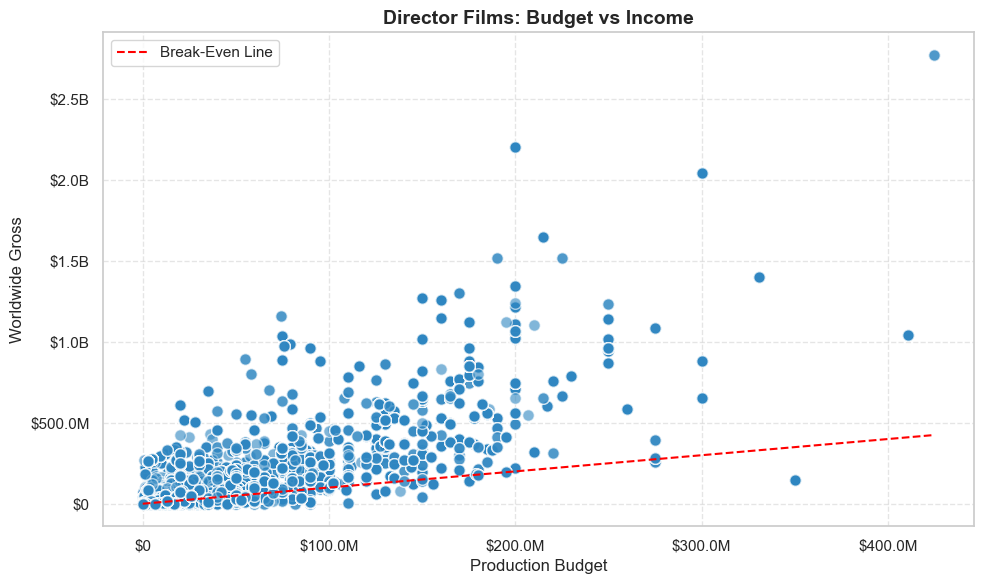

In [256]:

def currency_formatter(x, pos):
    if x >= 1e9:
        return f'${x*1e-9:.1f}B'
    elif x >= 1e6:
        return f'${x*1e-6:.1f}M'
    else:
        return f'${x:,.0f}'

# 2. Plotting section
plt.figure(figsize=(10, 6)) # Increased size slightly for better spacing

plt.scatter(
    directors_financials['production_budget'],
    directors_financials['worldwide_gross'],
    alpha=0.6,       # Make dots slightly transparent to see overlaps
    edgecolors='w',  # Add a white rim to points for distinction
    s=70,            # Increase dot size
    color='#2E86C1'  # Professional blue color
)

plt.xlabel('Production Budget', fontsize=12)
plt.ylabel('Worldwide Gross', fontsize=12)
plt.title('Director Films: Budget vs Income', fontsize=14, weight='bold')

# 3. Apply Formatter to BOTH Axes
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(currency_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Diagonal red line indicating "Break Even" (where Income = Budget)
# Movies below this line lost money; movies above it made a profit.
line_max = min(directors_financials['production_budget'].max(), directors_financials['worldwide_gross'].max())
plt.plot([0, line_max], [0, line_max], color='red', linestyle='--', label='Break-Even Line')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5) # Add grid for readability
plt.tight_layout()
save_path = os.path.join('charts','director_vs_budget_income.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

print(f"Chart saved successfully to: {save_path}")

plt.show()

### Bar chart of Director (Director's Name vs Income)

Chart saved successfully to: charts\top10_director_movie_income_chart.png


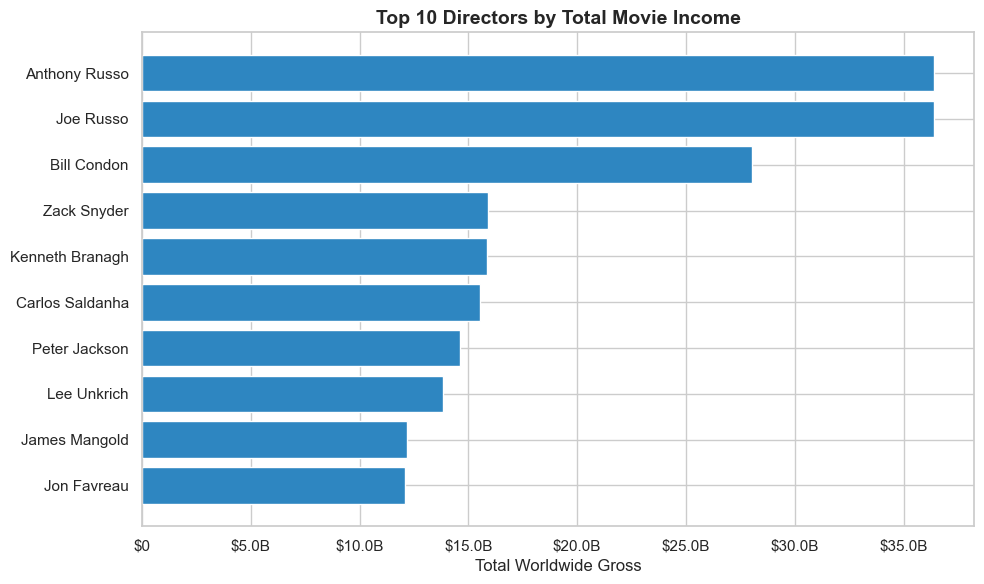

In [257]:
from matplotlib.ticker import FuncFormatter

# 1. Define a helper function to format large currency numbers
def currency_formatter(x, pos):
    if x >= 1e9:
        return f'${x*1e-9:.1f}B'  # Format as Billions
    elif x >= 1e6:
        return f'${x*1e-6:.1f}M'  # Format as Millions
    else:
        return f'${x:,.0f}'       # Format as regular number with commas

# 2. Your Plotting Code
top_directors = director_performance.head(10)

plt.figure(figsize=(10, 6)) # Increased size slightly for readability
plt.barh(
    top_directors['primary_name'],
    top_directors['total_income'],
    color='#2E86C1' # Added a professional blue color
)

plt.xlabel('Total Worldwide Gross', fontsize=12)
plt.title('Top 10 Directors by Total Movie Income', fontsize=14, weight='bold')

# 3. Apply the Currency Formatter to the X-Axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.gca().invert_yaxis() # Highest earner at the top
plt.tight_layout()
save_path = os.path.join('charts','top10_director_movie_income_chart.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

print(f"Chart saved successfully to: {save_path}")

plt.show()

### Writers

Chart saved successfully to: charts\writer_budget_vs_income.png


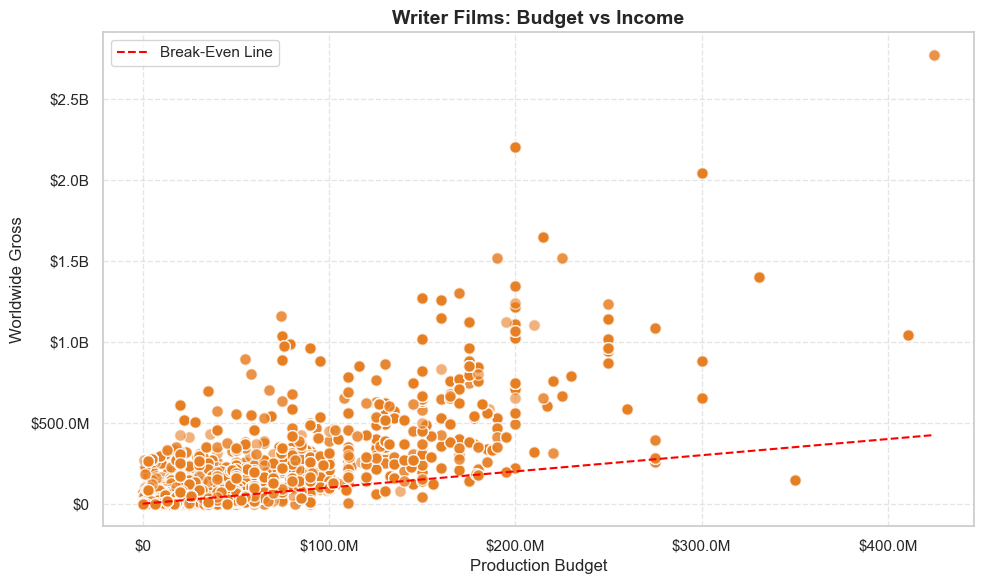

In [258]:
def currency_formatter(x, pos):
    if x >= 1e9:
        return f'${x*1e-9:.1f}B'
    elif x >= 1e6:
        return f'${x*1e-6:.1f}M'
    else:
        return f'${x:,.0f}'

# 2. Plotting Code for WRITERS
plt.figure(figsize=(10, 6))

plt.scatter(
    writers_financials['production_budget'],
    writers_financials['worldwide_gross'],
    alpha=0.6,        # Transparency helps visualization when points overlap
    edgecolors='w',   # White rim around dots
    s=70,             # Dot size
    color='#E67E22'   # Different color (Orange) to distinguish from Directors
)

plt.xlabel('Production Budget', fontsize=12)
plt.ylabel('Worldwide Gross', fontsize=12)
plt.title('Writer Films: Budget vs Income', fontsize=14, weight='bold') # Fixed Title

# 3. Apply Formatter to BOTH Axes
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(currency_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Break-Even Line (Income = Budget)
# Find the maximum value to know where to draw the line
line_max = min(writers_financials['production_budget'].max(), writers_financials['worldwide_gross'].max())
plt.plot([0, line_max], [0, line_max], color='red', linestyle='--', label='Break-Even Line')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
save_path = os.path.join('charts','writer_budget_vs_income.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

print(f"Chart saved successfully to: {save_path}")

plt.show()

Chart saved successfully to: charts\top10_writers_by_Movie_Income.png


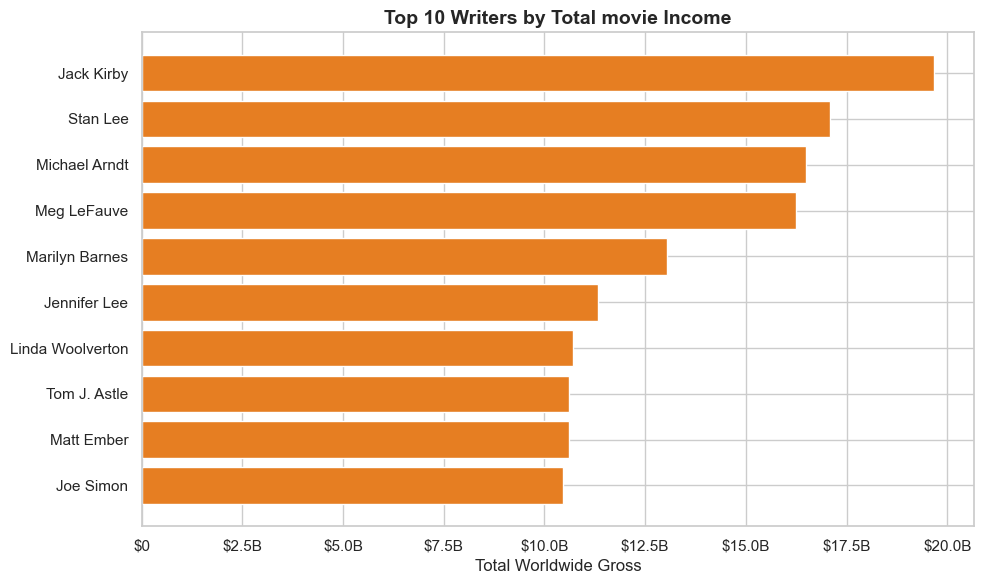

In [259]:
# visualizing Top 10 Writers by Total Income (Bar)
def currency_formatter(x, pos):
    if x >= 1e9:
        return f'${x*1e-9:.1f}B'
    elif x >= 1e6:
        return f'${x*1e-6:.1f}M'
    else:
        return f'${x:,.0f}'

# 2. Plotting Code
top_writers = writer_performance.head(10)

plt.figure(figsize=(10, 6)) # Increased size for better label readability

plt.barh(
    top_writers['primary_name'],
    top_writers['total_income'],
    color='#E67E22'  
)

plt.xlabel('Total Worldwide Gross', fontsize=12)
plt.title('Top 10 Writers by Total movie Income', fontsize=14, weight='bold')

# 3. Apply the Currency Formatter to the X-Axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.gca().invert_yaxis() # Puts the highest earner at the top
plt.tight_layout()       # Prevents labels from being cut off
save_path = os.path.join('charts','top10_writers_by_Movie_Income.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

print(f"Chart saved successfully to: {save_path}")

plt.show()

### <u>DIRECTORS ANALYSIS</u>

In [228]:
#Prepare director data 
from scipy.stats import f_oneway

# keep directors with at least 2 movies
director_counts = (
    directors_financials
    .groupby('primary_name')['primary_title']
    .nunique()
)

valid_directors = director_counts[director_counts >= 2].index

director_test_df = directors_financials[
    directors_financials['primary_name'].isin(valid_directors)
]

In [230]:
#Build ROI groups per director
director_groups = [
    group['roi'].values
    for _, group in director_test_df.groupby('primary_name')
]

# Perform one-way ANOVA
director_anova = f_oneway(*director_groups)

print("One-way ANOVA p-value:", director_anova.pvalue)

One-way ANOVA p-value: 4.0757872897703455e-158


In [231]:
#Run the ANOVA
f_stat_dir, p_value_dir = f_oneway(*director_groups)
f_stat_dir, p_value_dir

(4.737425033303463, 4.0757872897703455e-158)

## Key Insight

`Director selection materially` affects financial efficiency, not just artistic outcomes.

`Director Impact on Budget Performance` (F-stat = 4.737425033303464, p-value = 4.0757872897703455e-158)

A one-way ANOVA was conducted to examine whether budget performance (ROI) varies across directors. The results show a statistically significant effect of director choice on ROI (F = 4.74, p < 0.001). This indicates that differences in budget efficiency across directors are unlikely to be due to chance, and that director selection plays a meaningful role in financial performance.

### <u>WRITERS ANALYSIS</u>

In [232]:
# keep writers with at least 2 movies
writer_counts = (
    writers_financials
    .groupby('primary_name')['primary_title']
    .nunique()
)

valid_writers = writer_counts[writer_counts >= 2].index

writer_test_df = writers_financials[
    writers_financials['primary_name'].isin(valid_writers)
]

In [233]:
#Build ROI groups per writer
writer_groups = [
    group['roi'].values
    for _, group in writer_test_df.groupby('primary_name')
]

#Run the ANOVA
f_stat_writer, p_value_writer = f_oneway(*writer_groups)
f_stat_writer, p_value_writer

(2.586284869873391, 3.8119652782864235e-78)

`Writer's Impact on Budget Performance` (F-stat= 2.5862848698733902, p-value= 3.8119652782872903e-78)

A one-way ANOVA was conducted to examine whether `return on investment` (ROI) varies across writers. The results show a statistically significant effect of writer choice on ROI (F = 2.59, p < 0.001). This indicates that differences in budget efficiency across writers are unlikely to be due to random chance, and that writer selection plays a meaningful role in financial performance.

These findings suggest that writer identity is a statistically meaningful factor in ROI outcomes. Some writers consistently deliver stronger financial efficiency, while others underperform even at comparable budget levels. As a result, choosing a writer is not a neutral decision from a budget performance perspective.

### Key Insight

`Writer selection` materially affects financial efficiency, not just narrative quality. Strategic writer choice can therefore contribute to improved return on investment and better budget outcomes for film projects.

In [234]:
#ANOVA test for directors and writers to quantify how much of the variation in ROI 
# is explained by each factor
def eta_squared(f_stat, df_between, df_within):
    return (f_stat * df_between) / (f_stat * df_between + df_within)

# Directors
eta_dir = eta_squared(
    f_stat_dir,
    len(director_groups) - 1,
    len(director_test_df) - len(director_groups)
)

# Writers
eta_wrt = eta_squared(
    f_stat_wrt,
    len(writer_groups) - 1,
    len(writer_test_df) - len(writer_groups)
)

eta_dir, eta_wrt

(0.3223180619403591, 0.36625111104963826)

To quantify the magnitude of these effects, eta-squared (η²) was calculated for each ANOVA. Director choice explains approximately 32% of the variance in ROI, while writer choice explains approximately 37%. These values indicate large effect sizes, suggesting that both director and writer selection play substantial roles in determining budget performance, with writer choice exhibiting a slightly stronger impact in this analysis.

In [244]:
#We focus on average ROI, with a minimum film count (2) to avoid one-hit outliers
top_directors_roi = (
    director_performance
    .query("movie_count >= 2")
    .sort_values('avg_roi', ascending=False)
    [['primary_name', 'movie_count', 'avg_roi', 'avg_budget', 'avg_income']]
    .head(10)
)

top_directors_roi

,primary_name,movie_count,avg_roi,avg_budget,avg_income
3143,William Brent Bell,2,53.29,"5,500,000.00","84,990,221.00"
1619,Kay Cannon,2,44.34,"47,086,666.67","378,736,313.60"
1642,Kenneth Branagh,4,33.01,"69,770,731.71","386,697,302.24"
721,David Gordon Green,6,30.82,"16,221,153.85","59,030,293.31"
1614,Katharine Round,2,28.62,"45,720,000.00","137,859,394.96"
287,Barry Jenkins,2,28.55,"5,000,000.00","50,116,730.33"
1819,M. Night Shyamalan,5,24.42,"36,315,789.47","229,959,500.05"
1305,Jeff Wadlow,2,23.41,"6,222,222.22","91,572,073.44"
716,David F. Sandberg,3,21.34,"27,000,000.00","216,336,593.13"
2501,Robbie Walsh,2,21.32,"3,380,000.00","111,585,922.40"


In [235]:
#We focus on average ROI, with a minimum film count (2) to avoid one-hit outliers
top_writers_roi = (
    writer_performance
    .query("movie_count >= 2")
    .sort_values('avg_roi', ascending=False)
    [['primary_name', 'movie_count', 'avg_roi', 'avg_budget', 'avg_income']]
    .head(10)
)

top_writers_roi

,primary_name,movie_count,avg_roi,avg_budget,avg_income
66,Aditya Halbe,2,69.35,"42,956,250.00","377,312,461.00"
2368,John Carpenter,2,48.89,"13,065,000.00","94,060,233.20"
1103,Danny McBride,3,48.78,"22,065,000.00","101,949,185.60"
885,Chris Weitz,2,44.39,"59,020,000.00","442,406,815.47"
811,Charles Perrault,3,41.76,"62,206,250.00","431,282,724.25"
2718,Kay Cannon,4,39.97,"45,664,705.88","363,317,976.65"
4895,Tom J. Astle,2,29.47,"48,219,178.08","145,229,862.70"
3235,Matt Ember,2,29.47,"48,219,178.08","145,229,862.70"
3704,Oren Peli,7,28.72,"4,888,888.89","120,945,689.89"
466,Barry Jenkins,2,28.55,"5,000,000.00","50,116,730.33"


# Final Recommendation: Best Creators for Budget Performance

Based on ROI-focused performance metrics and statistical testing, the most budget-efficient directors and writers are those with consistently high average ROI across multiple films. These creators deliver strong financial returns relative to production cost, making them optimal choices for a studio seeking sustainable profitability rather than one-off box office success.

Given that director choice has a stronger statistical influence on ROI than writer choice, studios should prioritize high-ROI directors as the primary decision lever, while using strong writers to reinforce consistency and reduce downside risk.

In [32]:
# Read columns within the Table: 'known_for' to check the structure
df_known_for = pd.read_sql("SELECT * FROM known_for", conn)

# View columns and types
print(df_known_for.info())

# View raw data
df_known_for.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB
None


,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [33]:
# Read columns within the Table: 'movie_akas' to check the structure
df_movie_akas = pd.read_sql("SELECT * FROM movie_akas", conn)

# View columns and types
print(df_movie_akas.info())

# View raw data
df_movie_akas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB
None


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [36]:
# Read columns within the Table: 'principals' to check the structure
df_principals = pd.read_sql("SELECT * FROM principals", conn)

# View columns and types
print(df_principals.info())

# View raw data
df_principals.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
None


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


## 3. <u>Rotten Tomatoes Info</u>

In [39]:
# Read the RT movie info file and display the available columns
df_rt_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
print(df_rt_info.shape)
print(df_rt_info.columns)

(1560, 12)
Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


In [40]:
# Review the columns number, rows number and column types of the Dataset
df_rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [41]:
#Summary of the Raw Data
df_rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


## 4. <u>Rotten Tomatoes</u>

In [43]:
# Read the RT reviews file and display the available columns
df_rt = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='latin-1')
print(df_rt.shape)
print(df_rt.columns)

(54432, 8)
Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')


In [44]:
# Review the columns number, rows number and column types of the Dataset
df_rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [45]:
#Summary of the Raw Data
df_rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [46]:
# Review the columns number, rows number and column types of the Dataset
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [47]:
# Summary of the Raw Data
df_rt.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


## 5. <u>The Movie DB</u>

In [49]:
# Read the tmdb file and display the available columns
df_tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')
print(df_tmdb.shape)
print(df_tmdb.columns)

(26517, 10)
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


## 6. <u>The Numbers</u>

In [162]:
# Read the tn movie budgets file and display the available columns
df_tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
print(df_tn.shape)
print(df_tn.columns)

(5782, 6)
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [80]:
# Review the columns number, rows number and column types of the Dataset
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## <u>Analysis:</u> Genre Distribution by Budget Category

**Why this graph?**
While we know which genres earn the most, it is crucial to understand the "barrier to entry" for each genre. This visualization segments movies into **Low**, **Medium**, and **High** budget categories to reveal which genres dominate at each financial tier.

**What to look for:**
* **Low Budget dominance:** Often dominated by *Drama*, *Horror*, or *Comedy* (genres relying on script/acting rather than VFX).
* **High Budget dominance:** Likely dominated by *Action*, *Adventure*, and *Sci-Fi* (genres requiring expensive production sets and CGI).
* **Strategic Insight:** If the studio wants to minimize risk (Low Budget), which genres offer the most volume and opportunity?

Chart saved successfully to: charts\Top3_genres_by_volume_per_budget_category.png


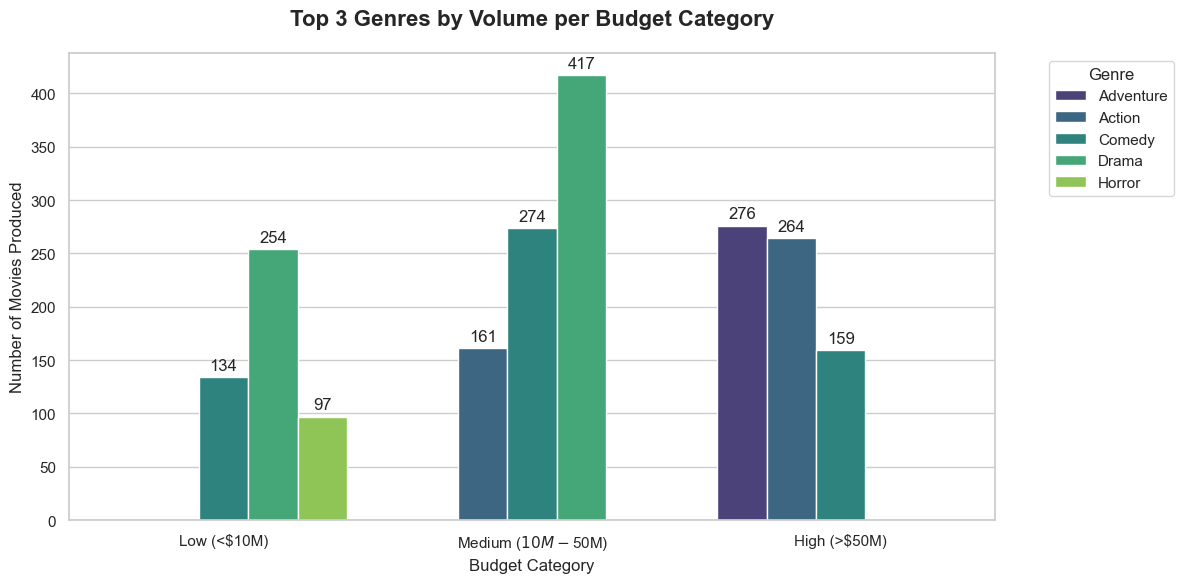

In [260]:

# 1. Load and Clean Budget Data (The Numbers)
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# Clean currency columns (remove '$' and ',')
cols_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols_to_clean:
    df_budgets[col] = df_budgets[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    df_budgets[col] = pd.to_numeric(df_budgets[col])

# Normalize titles for merging (using your existing helper function)
df_budgets['clean_title'] = df_budgets['movie'].map(clean_title)
# Extract year from release_date for accurate merging
df_budgets['year'] = pd.to_datetime(df_budgets['release_date']).dt.year

# 2. Merge Budget Data with Genre Data (using df_imdb_clean from your previous steps)
# Note: We use inner join to ensure we only analyze movies where we have BOTH budget and genre info
df_budget_genre = df_budgets.merge(
    df_imdb_clean,
    left_on=['clean_title', 'year'],
    right_on=['clean_title', 'start_year'],
    how='inner'
)

# 3. Define Budget Categories
# We define thresholds: Low (<$10M), Medium ($10M-$50M), High (>$50M)
def categorize_budget(budget):
    if budget < 10_000_000:
        return 'Low (<$10M)'
    elif 10_000_000 <= budget < 50_000_000:
        return 'Medium ($10M-$50M)'
    else:
        return 'High (>$50M)'

df_budget_genre['budget_category'] = df_budget_genre['production_budget'].apply(categorize_budget)

# 4. Prepare Data for Visualization (Top 3 Genres per Category)
# Explode genres to count individual genre occurrences
df_exploded = df_budget_genre.assign(genre=df_budget_genre['genres'].str.split(',')).explode('genre')

# Count movies per budget category and genre
genre_counts = (
    df_exploded.groupby(['budget_category', 'genre'])
    .size()
    .reset_index(name='movie_count')
)

# Sort and filter for top 3 genres in each category
top_genres_per_budget = (
    genre_counts.sort_values(['budget_category', 'movie_count'], ascending=[True, False])
    .groupby('budget_category')
    .head(3)
)

# Define logical order for the plot
category_order = ['Low (<$10M)', 'Medium ($10M-$50M)', 'High (>$50M)']

# 5. Create Visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a grouped bar chart
chart = sns.barplot(
    data=top_genres_per_budget,
    x='budget_category',
    y='movie_count',
    hue='genre',
    order=category_order,
    palette='viridis'
)

# Formatting
plt.title('Top 3 Genres by Volume per Budget Category', fontsize=16, weight='bold', pad=20)
plt.xlabel('Budget Category', fontsize=12)
plt.ylabel('Number of Movies Produced', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels on top of bars
for container in chart.containers:
    chart.bar_label(container, padding=3)

plt.tight_layout()
save_path = os.path.join('charts','Top3_genres_by_volume_per_budget_category.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

print(f"Chart saved successfully to: {save_path}")

plt.show()

### <u>Analysis:</u> which Movie Director has the Higest Average Rating ?

The goal of this query is to identify the single film director who holds the highest average audience rating across their entire body of work within the IMDb dataset. This metric attempts to isolate "quality consistency" by averaging scores from all movies linked to a specific director.

In [236]:
DATABASE_FILE = 'unzippedData/im.db'
conn = sqlite3.connect(DATABASE_FILE) 
cursor = conn.cursor()

# 2. The SQL Query to Find the Director with the Highest Average Rating
# This uses the specific table and column names from your Movie Data ERD
SQL_QUERY = """
SELECT
    P.primary_name AS Director_Name,
    R.averagerating AS Average_Movie_Rating

FROM
    movie_basics AS M
    
-- Link to the movie ratings (using movie_id)
INNER JOIN 
    movie_ratings AS R ON M.movie_id = R.movie_id

-- Link to the directors table (using movie_id)
INNER JOIN 
    directors AS D ON M.movie_id = D.movie_id

-- Link to the persons table to get the name (using person_id)
INNER JOIN 
    persons AS P ON D.person_id = P.person_id

-- Group by director name to calculate the average for all their movies
GROUP BY 
    P.primary_name

-- Order by the highest average first
ORDER BY 
    Average_Movie_Rating DESC

-- Only return the top result
LIMIT 1;
"""

# 3. Execute and Print the Result
print(f"--- Querying existing database: {DATABASE_FILE} for Top Director ---")

try:
    cursor.execute(SQL_QUERY)
    result = cursor.fetchone()

    if result:
        # The result will contain the director's name and the average rating
        director_name, avg_rating = result
        print(f"Director: {director_name}")
        print(f"Average Rating: {avg_rating:.2f}")
    else:
        print("Query returned no results. Check if your tables are correctly named and populated.")

except sqlite3.OperationalError as e:
    # This catch is very helpful if a table or column name is wrong in your database
    print(f"Error executing query. Check table/column names and database file path: {e}")

finally:
    # 4. Cleanup
    conn.close()

--- Querying existing database: unzippedData/im.db for Top Director ---
Director: Tristan David Luciotti
Average Rating: 10.00


### <u>Analysis:</u> List of Rated Genre Combinations ?

This analysis aims to identify which specific combinations of genres yield the highest satisfaction among audiences. Unlike broad genre analysis (e.g., "Action" vs. "Comedy"), this query looks at specific sub-niche pairings (e.g., "Documentary,History,War") to see where specific viewer tastes align with high ratings.

In [237]:
import sqlite3
# --- Connect to your EXISTING database file ---
DATABASE_FILE = 'unzippedData/im.db'
conn = sqlite3.connect(DATABASE_FILE) 
cursor = conn.cursor()

# SQL Query: Corrected to calculate TRUE Average and filter for sample size
SQL_QUERY = """
SELECT
    M.genres,
    AVG(R.averagerating) AS Average_Genre_Rating, -- FIXED: Added AVG() aggregation
    COUNT(M.movie_id) AS Movie_Count            -- Added count for context
FROM
    movie_ratings AS R
INNER JOIN 
    movie_basics AS M ON R.movie_id = M.movie_id 
WHERE
    M.genres IS NOT NULL
GROUP BY 
    M.genres
HAVING 
    Movie_Count > 10   -- OPTIONAL: Filters out genres with fewer than 10 movies to ensure statistical significance
ORDER BY 
    Average_Genre_Rating DESC
LIMIT 10;
"""

print(f"--- Querying existing database: {DATABASE_FILE} for Top Genre Combinations ---")

try:
    cursor.execute(SQL_QUERY)
    results = cursor.fetchall() 
    
    if results:
        print("\n Top 10 Highest Rated Genre Combinations (min. 10 movies):")
        print("-" * 65)
        print(f"{'Genre Combination':<40} | {'Avg Rating':<10} | {'Count'}")
        print("-" * 65)
        for genre, avg_rating, count in results:
            print(f"{genre:<40} | {avg_rating:.2f}       | {count}")
    else:
        print("Query returned no results.")

except sqlite3.OperationalError as e:
    print(f"Error executing query: {e}")

finally:
    conn.close()

--- Querying existing database: unzippedData/im.db for Top Genre Combinations ---

 Top 10 Highest Rated Genre Combinations (min. 10 movies):
-----------------------------------------------------------------
Genre Combination                        | Avg Rating | Count
-----------------------------------------------------------------
Documentary,Family,Sport                 | 8.06       | 16
Action,Documentary,Sport                 | 7.86       | 19
Documentary,Family,News                  | 7.72       | 19
Documentary,Family,Music                 | 7.69       | 23
Comedy,Documentary,Music                 | 7.63       | 14
Music                                    | 7.62       | 176
Documentary,Drama,War                    | 7.61       | 24
Adventure,Documentary,Family             | 7.60       | 38
Action,Documentary,Drama                 | 7.60       | 29
Adventure,Documentary,Sport              | 7.60       | 37
